# **Daegu Apartment**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

## **1. Business Problem Understanding**

#### **Context**

Daegu merupakan wilayah metropolitan dengan populasi terbesar ke-4 di Korea Selatan. Kota yang berjarak 244 km dari Seoul ini dikenal sebagai pusatnya kota industri. Di Daegu, merek besar seperti Samsung, LG, Posco, dan Hyundai terlahir. Dengan populasi yang besar dan pusat industri yang berkembang, permintaan akan hunian, terutama apartemen, meningkat seiring dengan peningkatan jumlah pekerja dan keluarganya yang memilih untuk menetap di kota ini. Faktor-faktor ini mendorong pembangunan apartemen yang lebih banyak dan beragam, dari hunian mewah hingga apartemen yang lebih terjangkau.
Seiring berkembangnya industri dan bertambahnya populasi, tren di pasar properti, khususnya apartemen, cenderung terus berkembang, menawarkan peluang baik bagi investor maupun bagi mereka yang mencari tempat tinggal baru di pusat kota industri Korea Selatan ini.


#### **Business Problem**

Dalam ranah pasar real estate, salah satu tantangan signifikan yang dihadapi oleh pemilik apartemen adalah penetapan harga jual yang optimal. Tujuan pemilik adalah untuk memaksimalkan keuntungan dari penjualan properti mereka, namun mereka juga harus mengakomodasi preferensi dan anggaran calon pembeli. Mematok harga terlalu tinggi dapat menghambat penjualan, sementara menetapkan harga terlalu rendah berisiko mengurangi margin keuntungan.

Oleh karena itu, diperlukan suatu analisis yang komprehensif mengenai elemen-elemen yang mempengaruhi nilai pasar apartemen untuk menentukan harga yang sesuai. Studi ini bertujuan untuk mengidentifikasi dan menganalisis faktor-faktor internal dan eksternal yang mempengaruhi nilai jual apartemen, termasuk ukuran properti, fasilitas di sekitar lokasi, jarak dengan sistem transportasi publik seperti stasiun kereta bawah tanah, serta usia bangunan, dan faktor lainnya.


#### **Goals**

Dengan mengetahui faktor-faktor yang paling berpengaruh terhadap harga apartemen, pemilik apartemen dapat mengambil keputusan yang lebih tepat dalam menentukan harga jualnya. Selain itu, dengan mengembangkan Model Prediktif (Machine Learning) yang dapat mengestimasi harga jual apartemen dengan memanfaatkan variabel-variabel yang tersedia dalam dataset. Model ini akan membantu dalam memprediksi harga yang paling mungkin akan diterima di pasar, dengan mempertimbangkan faktor-faktor seperti lokasi, fasilitas, dan karakteristik lain dari apartemen.


#### **Analytic Approach**

Melalui analisis statistik, kita akan mengidentifikasi variabel-variabel yang signifikan dalam menentukan harga apartemen. Proses ini meliputi analisis regresi dan uji statistik untuk mengevaluasi seberapa besar pengaruh dan arah dari setiap variabel terhadap harga jual.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu pemilik apartemen untuk dapat menyediakan 'tool' prediksi harga jual yang baru, yang mana akan berguna untuk pemilik dalam menentukan harga jual unit apartemen nya.


#### **Metric Evaluation**

Untuk mengevaluasi performa model regresi dalam memprediksi harga jual apartemen, kita akan menggunakan tiga metrik evaluasi: RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), dan MAPE (Mean Absolute Percentage Error). RMSE adalah nilai rata-rata dari akar kuadrat dari selisih antara nilai prediksi dan nilai sebenarnya. MAE adalah nilai rata-rata dari selisih absolut antara prediksi dan nilai sebenarnya. Sedangkan MAPE adalah nilai rata-rata dari persentase kesalahan absolut yang dihasilkan oleh model.

Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan oleh model, semakin akurat model tersebut dalam memprediksi harga sewa sesuai dengan fitur-fitur yang digunakan. Dengan menggunakan tiga metrik evaluasi ini, kita mendapatkan gambaran menyeluruh tentang kinerja model regresi dalam memprediksi harga jual apartemen dan memastikan bahwa model memberikan prediksi yang akurat dan sesuai dengan data yang ada.

***

## **2. Data Understanding**

**Attributes Information**

| **No** | **Attribute** | **Data Type** | **Description** |
| --- | --- | --- | --- |
| 1 | HallwayType | Object | Tipe apartment |
| 2 | TimeToSubway | Object | Waktu ke stasiun kereta bawah tanah terdekat |
| 3 | SubwayStation | Object | Nama stasiun kereta bawah tanah terdekat |
| 4 | N_FacilitiesNearBy(ETC) | Float | Jumlah fasilitas terdekat |
| 5 | N_FacilitiesNearBy(PublicOffice) | Float | Jumlah fasilitas kantor terdekat |
| 6 | N_SchoolNearBy(University) | Float | Jumlah universitas tedekat |
| 7 | N_Parkinglot(Basement) | Float | Jumlah tempat parkir bawah tanah |
| 8 | YearBuilt | Integer | Tahun apartment dibangun |
| 9 | N_FacilitiesInApt | Integer | Jumlah fasilitas di dalam apartment |
| 10 | Size(sqf) | Integer | Ukuran apartment |
| 11 | SalePrice | Integer | Harga apartment (Won) |

In [2512]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [2513]:
# Load dataset
df = pd.read_csv('data_daegu_apartment.csv')
display(df.head(), df.tail())

,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
4118,terraced,0-5min,Sin-nam,0.0,3.0,2.0,475.0,2008,8,914,323008
4119,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1451,242477
4120,mixed,15min~20min,Myung-duk,5.0,6.0,5.0,536.0,1993,4,1761,168141
4121,corridor,5min~10min,Daegu,2.0,5.0,0.0,76.0,1985,3,676,73451
4122,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,868,250442


***

## **3. Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value, data duplikat dan outliers

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [2514]:
df_model = df.copy()

In [2515]:
display(df_model.describe(), df_model.describe(include='O'))

,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
count,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000,4123.000000
mean,1.930876,4.135338,2.746301,568.979141,2002.999757,5.817851,954.630851,221767.926995
std,2.198832,1.802640,1.496610,410.372742,8.905768,2.340507,383.805648,106739.839945
min,0.000000,0.000000,0.000000,0.000000,1978.000000,1.000000,135.000000,32743.000000
25%,0.000000,3.000000,2.000000,184.000000,1993.000000,4.000000,644.000000,144752.000000
50%,1.000000,5.000000,2.000000,536.000000,2006.000000,5.000000,910.000000,209734.000000
75%,5.000000,5.000000,4.000000,798.000000,2008.000000,7.000000,1149.000000,291150.000000
max,5.000000,7.000000,5.000000,1321.000000,2015.000000,10.000000,2337.000000,585840.000000


,HallwayType,TimeToSubway,SubwayStation
count,4123,4123,4123
unique,3,5,8
top,terraced,0-5min,Kyungbuk_uni_hospital
freq,2528,1953,1152


In [2516]:
# data unik di tiap kolom
listItem = []
for col in df_model.columns :
    listItem.append( [col, df_model[col].nunique(), df_model[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,HallwayType,3,"[terraced, mixed, corridor]"
1,TimeToSubway,5,"[0-5min, 10min~15min, 15min~20min, 5min~10min,..."
2,SubwayStation,8,"[Kyungbuk_uni_hospital, Chil-sung-market, Bang..."
3,N_FacilitiesNearBy(ETC),4,"[0.0, 1.0, 5.0, 2.0]"
4,N_FacilitiesNearBy(PublicOffice),8,"[3.0, 5.0, 7.0, 1.0, 4.0, 2.0, 6.0, 0.0]"
5,N_SchoolNearBy(University),6,"[2.0, 1.0, 3.0, 4.0, 5.0, 0.0]"
6,N_Parkinglot(Basement),20,"[1270.0, 0.0, 56.0, 798.0, 536.0, 605.0, 203.0..."
7,YearBuilt,16,"[2007, 1986, 1997, 2005, 2006, 2009, 2014, 199..."
8,N_FacilitiesInApt,9,"[10, 4, 5, 7, 2, 9, 8, 1, 3]"
9,Size(sqf),89,"[1387, 914, 558, 1743, 1334, 572, 910, 288, 11..."


#### **Cek Missing Value**

In [2517]:
df_model.isnull().sum()

HallwayType                         0
TimeToSubway                        0
SubwayStation                       0
N_FacilitiesNearBy(ETC)             0
N_FacilitiesNearBy(PublicOffice)    0
N_SchoolNearBy(University)          0
N_Parkinglot(Basement)              0
YearBuilt                           0
N_FacilitiesInApt                   0
Size(sqf)                           0
SalePrice                           0
dtype: int64

Tidak ada missing value dari 11 kolom pada dataset ini

#### **Cek Duplicate**

In [2518]:
duplicate = df_model.duplicated(subset=df_model.columns.difference(['SalePrice']))
print(f'Terdapat {duplicate.sum()} ({round(duplicate.sum() / df_model.shape[0] * 100, 2)}%) baris duplikat dari total {df_model.shape[0]} data')

Terdapat 4004 (97.11%) baris duplikat dari total 4123 data


Duplikasi Tanpa Kolom 'SalePrice': Terdapat 4004 baris (97.11% dari total data) yang diidentifikasi sebagai data duplikat berdasarkan semua kolom kecuali kolom 'SalePrice'. Ini menunjukkan bahwa sebagian besar data memiliki atribut apartemen yang serupa namun dengan harga jual yang berbeda. Kondisi seperti ini mungkin terjadi karena adanya variabel atau kondisi yang tidak dicatat dalam dataset, seperti variasi waktu penjualan atau posisi spesifik unit dalam bangunan yang mungkin mempengaruhi harga jual. Untuk menghindari potensi bias, saya akan menghapus baris duplikat ini

In [2519]:
df_model.drop_duplicates(subset=df_model.columns.difference(['SalePrice']), keep='first', inplace=True)
print(f'Jumlah baris setelah baris duplikat dihapus : {df_model.shape[0]}')
df_model.head()

Jumlah baris setelah baris duplikat dihapus : 119


,HallwayType,TimeToSubway,SubwayStation,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_SchoolNearBy(University),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,Kyungbuk_uni_hospital,0.0,3.0,2.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,Kyungbuk_uni_hospital,1.0,5.0,1.0,0.0,1986,4,914,150442
2,mixed,15min~20min,Chil-sung-market,1.0,7.0,3.0,56.0,1997,5,558,61946
3,mixed,5min~10min,Bangoge,5.0,5.0,4.0,798.0,2005,7,914,165486
4,terraced,0-5min,Sin-nam,0.0,1.0,2.0,536.0,2006,5,1743,311504


#### **Cek Outliers**

In [2520]:
def CheckOutliers(df_model, col):
    Q1 = df_model[col].quantile(0.25)
    Q3 = df_model[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_fence = Q1 - 1.5 * IQR
    upper_fence = Q3 + 1.5 * IQR
    
    outliers = df_model[(df_model[col] < lower_fence) | (df_model[col] > upper_fence)]
    
    results_df = pd.DataFrame({
        "Q1": [Q1],
        "Q3": [Q3],
        "IQR": [IQR],
        "Lower Fence": [lower_fence],
        "Upper Fence": [upper_fence],
        "Min Value" : [min(df_model[col])],
        "Max Value" : [max(df_model[col])],
        "Outliers Sum" : [len(outliers)],
        "Outliers Percentage": [round((len(outliers) / len(df_model)) * 100, 2)]
    })

    return results_df

def calculate_all_numeric_outliers(df_model):
    numeric_cols = df_model.select_dtypes(include='number').columns
    
    all_results = pd.DataFrame()
    
    for col in numeric_cols:
        result_df = CheckOutliers(df_model, col)
        result_df.insert(0, 'Column', col)
        all_results = pd.concat([all_results, result_df], ignore_index=True)
    
    return all_results

calculate_all_numeric_outliers(df_model)

,Column,Q1,Q3,IQR,Lower Fence,Upper Fence,Min Value,Max Value,Outliers Sum,Outliers Percentage
0,N_FacilitiesNearBy(ETC),0.0,2.0,2.0,-3.00,5.00,0.0,5.0,0,0.00
1,N_FacilitiesNearBy(PublicOffice),3.0,5.0,2.0,0.00,8.00,0.0,7.0,0,0.00
2,N_SchoolNearBy(University),1.0,4.0,3.0,-3.50,8.50,0.0,5.0,0,0.00
3,N_Parkinglot(Basement),93.5,798.0,704.5,-963.25,1854.75,0.0,1321.0,0,0.00
4,YearBuilt,1993.0,2014.0,21.0,1961.50,2045.50,1978.0,2015.0,0,0.00
5,N_FacilitiesInApt,3.0,7.0,4.0,-3.00,13.00,1.0,10.0,0,0.00
6,Size(sqf),644.0,1264.5,620.5,-286.75,2195.25,135.0,2337.0,1,0.84
7,SalePrice,113937.5,325663.0,211725.5,-203650.75,643251.25,44247.0,515044.0,0,0.00


Outliers terdeteksi pada kolom Size(sqf). Diambil keputusan untuk tidak menghapus outliers karena jumlah data nya sangat kecil yaitu 1 data (0.84%).

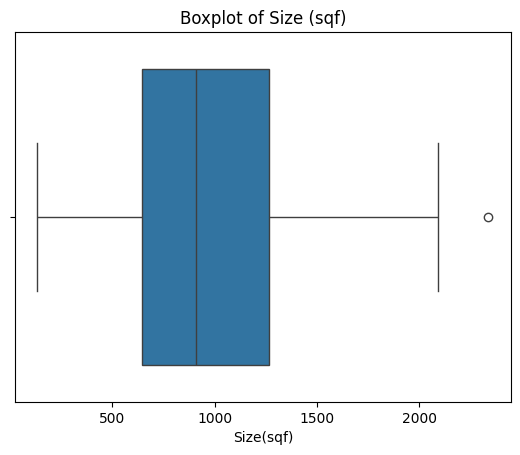

In [2521]:
sns.boxplot(data=df_model, x='Size(sqf)')
plt.title('Boxplot of Size (sqf)')
plt.show()

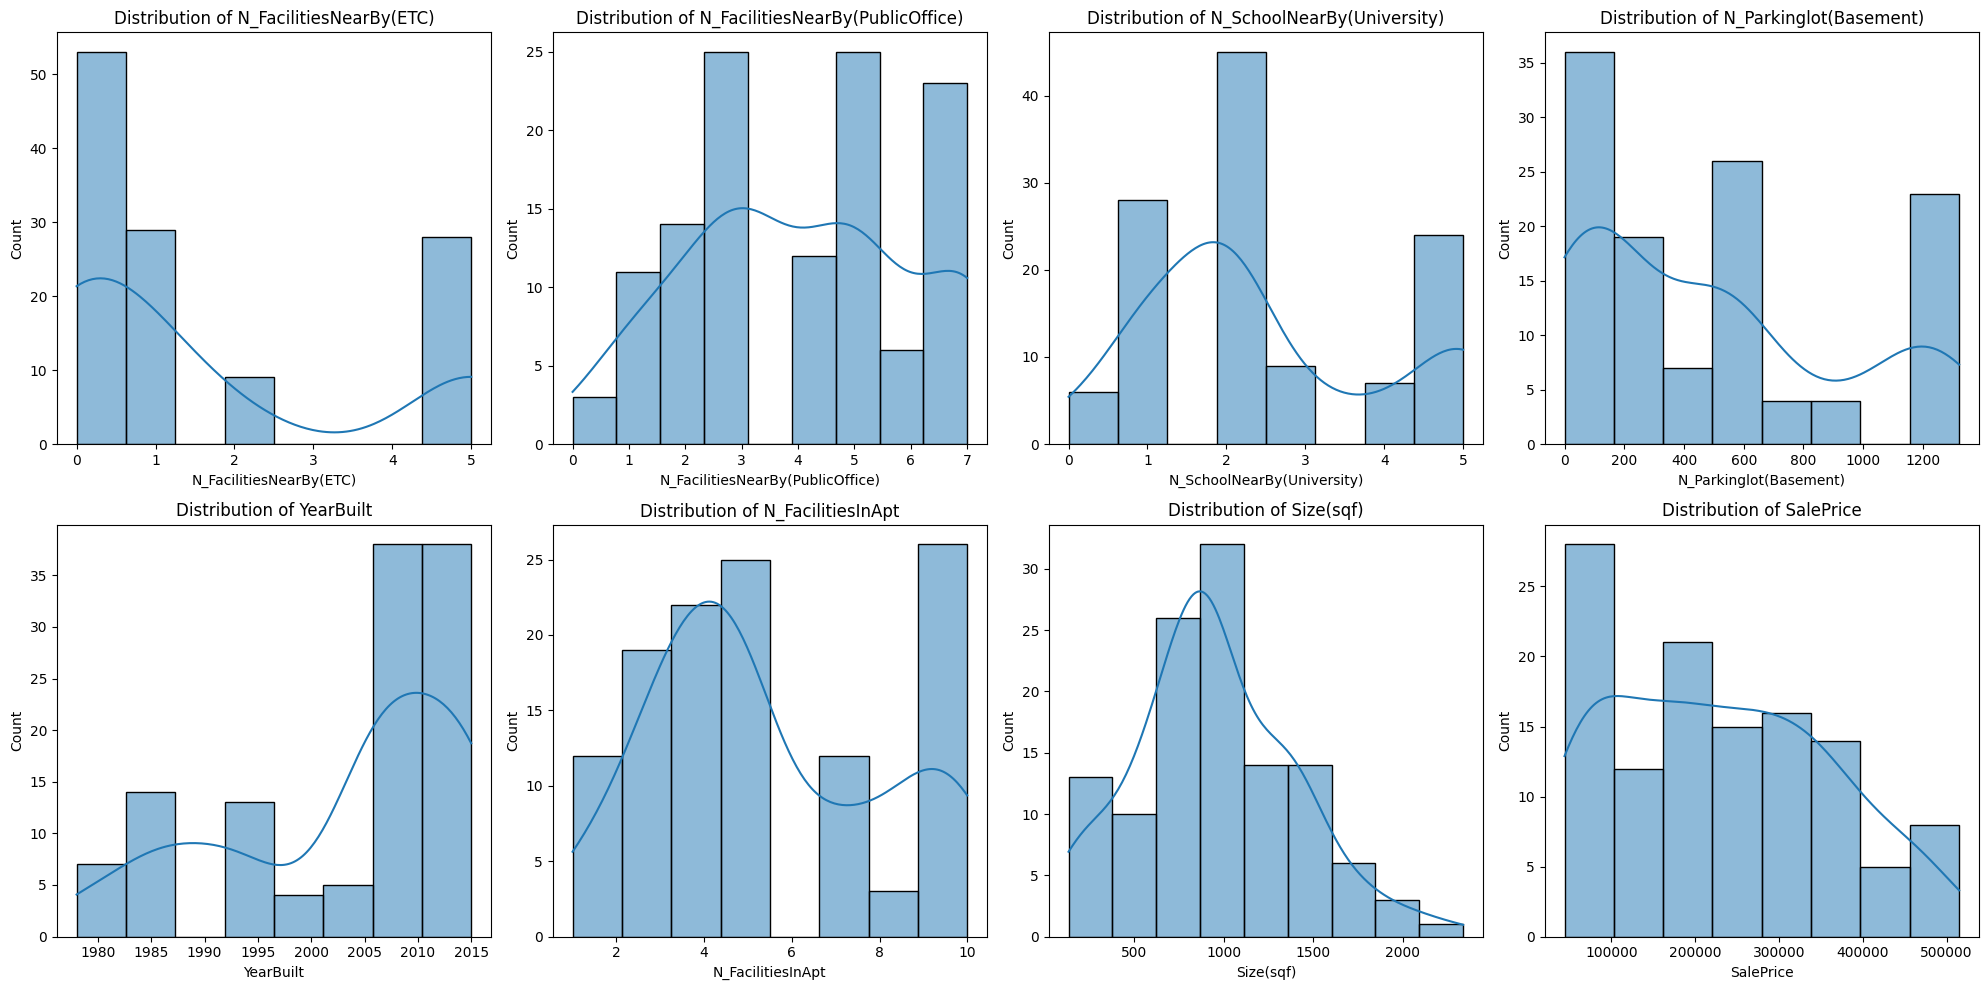

In [2522]:
numeric_cols = df_model.select_dtypes(include='number')

# Membuat subplots dengan ukuran 2x4
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()  # Mengubah axes menjadi array 1D untuk iterasi yang lebih mudah

# Memplot histogram untuk setiap kolom numerik
for i, column in enumerate(numeric_cols):
    sns.histplot(numeric_cols[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')

# Menyesuaikan tata letak
plt.tight_layout()
plt.show()

Dari histogram diatas, terlihat jelas bahwa semua variabel tidak terdistribusi normal. Untuk analisis korelasi menggunakan Spearman sebagai metode korelasi dapat memberikan wawasan yang lebih akurat tentang hubungan antar variabel.

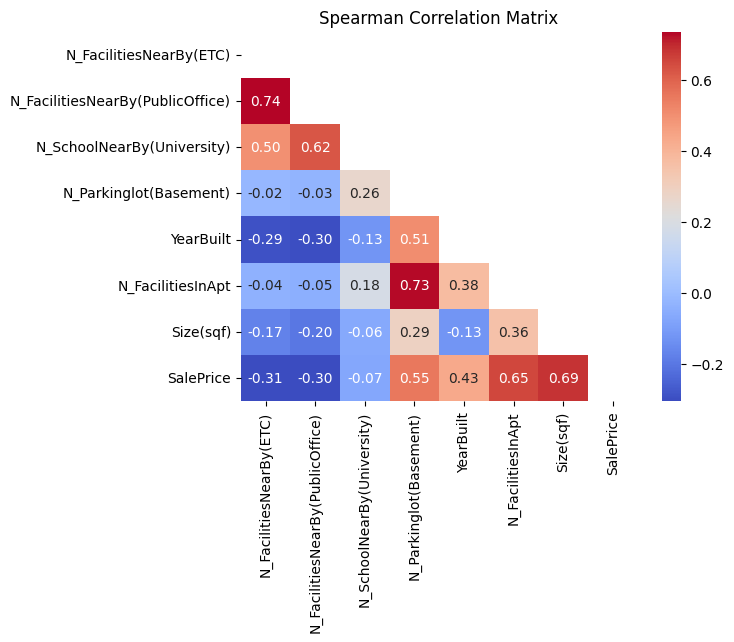

In [2523]:
df_corr = df_model.corr(numeric_only=True, method='spearman')
matriks = np.triu(df_corr)

sns.heatmap(df_corr, annot=True, fmt=".2f", mask=matriks, cmap="coolwarm")
plt.title('Spearman Correlation Matrix')
plt.show()

Correlation matrix menunjukan bahwa 'Size(sqf)', 'N_FacilitiesInApt', 'N_Parkinglot(Basement)' dan 'YearBuilt' adalah fitur yang memiliki korelasi sedang positif terhadap fitur 'SalePrice'

- Apartemen yang lebih luas cenderung dihargai lebih tinggi, yang mencerminkan nilai tambah dari ruang yang lebih besar
- Apartemen yang memiliki lebih banyak fasilitas yang tersedia cenderung dihargai lebih tinggi
- Apartemen yang memiliki lebih banyak tempat parkir basement cenderung dihargai lebih tinggi
- Apartemen yang lebih baru cenderung memiliki harga jual yang lebih tinggi

#### **Drop Columns**

- Ditinjau berdasarkan domain knowledge, fitur 'TimeToSubway' sudah mencakup informasi yang dibutuhkan, menjadikan SubwayStation tidak relevan karena hanya menampilkan nama stasiun terdekat
- Berdasarkan pengecekan korelasi, Fitur 'N_SchoolNearBy(University)' memiliki pengaruh yang lemah terhadap variabel target 'SalePrice' 

In [2524]:
df_model.drop(['SubwayStation','N_SchoolNearBy(University)'], axis=1, inplace=True)

#### **Clean Dataset**

In [2525]:
df_model.head()

,HallwayType,TimeToSubway,N_FacilitiesNearBy(ETC),N_FacilitiesNearBy(PublicOffice),N_Parkinglot(Basement),YearBuilt,N_FacilitiesInApt,Size(sqf),SalePrice
0,terraced,0-5min,0.0,3.0,1270.0,2007,10,1387,346017
1,terraced,10min~15min,1.0,5.0,0.0,1986,4,914,150442
2,mixed,15min~20min,1.0,7.0,56.0,1997,5,558,61946
3,mixed,5min~10min,5.0,5.0,798.0,2005,7,914,165486
4,terraced,0-5min,0.0,1.0,536.0,2006,5,1743,311504


In [2526]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 119 entries, 0 to 4102
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   HallwayType                       119 non-null    object 
 1   TimeToSubway                      119 non-null    object 
 2   N_FacilitiesNearBy(ETC)           119 non-null    float64
 3   N_FacilitiesNearBy(PublicOffice)  119 non-null    float64
 4   N_Parkinglot(Basement)            119 non-null    float64
 5   YearBuilt                         119 non-null    int64  
 6   N_FacilitiesInApt                 119 non-null    int64  
 7   Size(sqf)                         119 non-null    int64  
 8   SalePrice                         119 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 9.3+ KB


***

## **4. Modelling**

In [2527]:
# Import library untuk modeling
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import TransformedTargetRegressor

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.preprocessing import RobustScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

#### **Encoding**

Agar dapat menggunakan semua fitur yang dipilih, maka fitur-fitur kategorikal harus diubah menjadi fitur numerikal. Kita dapat menggunakan ColumnTransformer untuk dapat mengubah tipe datanya, yang mana nanti dapat diaplikasikan pada pipeline model.

1. Merubah fitur/kolom 'TimeToSubway' menggunakan Binary Encoder, karena data ini memiliki beberapa kategori atau label yang tidak memiliki urutan tertentu, dan tidak ingin memberikan urutan atau tingkatan tertentu dalam kategori tersebut.
1. Merubah fitur/kolom 'HallwayType' menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan.
1. Keseluruhan fitur kecuali data target **(SalePrice)** akan dilakukan scaler dengan 'RobustScaler'

In [2528]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(), ['HallwayType']),
    ('Binary', ce.BinaryEncoder(), ['TimeToSubway']),
], remainder='passthrough')

#### **Features & Target**

In [2529]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(columns=['SalePrice'])
y = df_model['SalePrice']

#### **Splitting**

In [2530]:
# Splitting data training dan test dengan proporsi 78:22
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.22,
    random_state=1)

#### **Choose a Benchmark Model**

In [2531]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
gb = GradientBoostingRegressor(random_state=1)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = RobustScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_gb, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan tiap metrics
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[ -67061.9648841   -70034.68015071  -70201.19394208 -128660.77220587
  -77945.22080514] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-52602.29527356 -51953.46904099 -58191.84613501 -93009.99296389
 -67120.01552289] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.29609855 -0.31545159 -0.24292849 -0.37719144 -0.33772609] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-92973.42514001 -67594.93104642 -85189.06177484 -82030.56345701
 -59523.30622877] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-70816.99530999 -55705.40366014 -72129.86274621 -62469.99212674
 -48135.28813184] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'ex

In [2532]:
# Evaluasi hasil dari 6 kandidat algoritma yang digunakan
df_evaluasi_train = pd.DataFrame({
    'Model':['Linear Regression', 'KNN Regressor', 'Decision Tree Regressor', 'Random Forest Regressor', 'XGB Regressor', 'Gradien Boost Regressor'],
    'Mean_RMSE': nilai_mean_rmse, 
    'Std_RMSE': nilai_std_rmse, 
    'Mean_MAE': nilai_mean_mae, 
    'Std_MAE': nilai_std_mae, 
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape,
})

df_evaluasi_train

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-82780.766398,23221.311388,-64575.523787,15221.164758,-0.313879,0.044564
1,KNN Regressor,-77462.257529,12168.314174,-61851.508395,9080.928891,-0.325128,0.047811
2,Decision Tree Regressor,-75658.239426,10474.569333,-56357.985380,8930.746796,-0.302347,0.034429
3,Random Forest Regressor,-58444.489157,7351.721265,-45586.687510,7071.763390,-0.235072,0.028742
4,XGB Regressor,-57228.656624,6132.855525,-44071.305343,4885.027206,-0.222911,0.032308
5,Gradien Boost Regressor,-61759.609003,7005.487075,-47074.215890,5819.419204,-0.246324,0.027236


Akan dilakukan prediksi pada test set dengan 2 benchmark model terbaik, yaitu XGB Regressor dan Random Forest Regressor

#### **Predict to Test Set with the Benchmark Model**

In [2533]:
# Benchmark 2 model terbaik
models = {
    'Random Forest Regressor' : RandomForestRegressor(random_state=1),
    'XGB': XGBRegressor(random_state=1)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
Random Forest Regressor,63454.633562,48021.775926,0.249932
XGB,69401.063709,51368.536603,0.269143


#### **Hyperparameter Tuning**

Akan dilakukan hyperparameter tuning terhadap 2 model diatas dengan harapan dapat meningkatkan performa model

**1. Random Forest**

In [2534]:
# model criteria
bootstrap = [True, False]

# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Jumlah feature untuk tiap splitting
max_features = list(np.arange(1, 5))

# Jumlah sample sebelum splitting
min_samples_split = list(np.arange(2, 6))

# Jumlah sample sesudah splitting
min_samples_leaf = list(np.arange(1, 5, 2))

# Jumlah estimators
n_estimators = list(np.arange(100,201))

# hyperparameter space Decision Tree
hyperparam_space_rf = {
    'model__bootstrap' : bootstrap,
    'model__max_depth': max_depth,            
    'model__max_features': max_features,          
    'model__min_samples_split': min_samples_split,    
    'model__min_samples_leaf' : min_samples_leaf,
    'model__n_estimators' : n_estimators     
}

# Benchmark model dengan hyperparameter tuning
rf = RandomForestRegressor(random_state=1)

# Membuat algorithm chains
estimator_rf = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', rf)
        ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf, 
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = 5, 
    n_jobs = -1, 
    scoring = 'neg_mean_absolute_error', 
    verbose = 1
)

In [2535]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=1))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'model__bootstrap...
                                                                np.int64(108),
                                                                np.int64(109),
                                                                np.int64(110),
                                                                np.int64(111),
                                                                np.int64(112),
                                                                np.int64(113),
                                                                np.int64(114),
                                                                np.int64(115),
                                                                np.int64(116),
                                                                np.int64(117),
                                                                np.int64(118),
                                                                np.int64(119),
                                                                np.int64(120),
                                                                np.int64(121),
                                                                np.int64(122),
                                                                np.int64(123),
                                                                np.int64(124),
                                                                np.int64(125),
                                                                np.int64(126),
                                                                np.int64(127),
                                                                np.int64(128),
                                                                np.int64(129), ...]},
                   scoring='neg_mean_absolute_error', verbose=1)

In [2536]:
# Cek skor dan params terbaik
print('Random Forest Regressor')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest Regressor
Best_score: -49617.50762922292
Best_params: {'model__n_estimators': np.int64(175), 'model__min_samples_split': np.int64(4), 'model__min_samples_leaf': np.int64(1), 'model__max_features': np.int64(3), 'model__max_depth': np.int64(7), 'model__bootstrap': False}


In [2537]:
# Model RF
model = {'Random Forest Regressor': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
Random Forest Regressor,72690.557782,54494.866635,0.279296


**2. XGBoost**

In [2538]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
xgb_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    xgb_pipeline, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_error', # Hanya bisa memilih salah satu metric untuk optimisasi
    random_state = 1  
)

In [2539]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(),
                                                                               ['HallwayType']),
                                                                              ('Binary',
                                                                               BinaryEncoder(),
                                                                               ['TimeToSubway'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None...
                                                             np.float64(1.2915496650148828),
                                                             np.float64(3.593813663804626),
                                                             np.float64(10.0)],
                                        'model__subsample': [np.float64(0.2),
                                                             np.float64(0.3),
                                                             np.float64(0.4),
                                                             np.float64(0.5),
                                                             np.float64(0.6),
                                                             np.float64(0.7),
                                                             np.float64(0.8),
                                                             np.float64(0.9)]},
                   random_state=1, refit='neg_mean_absolute_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [2540]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -45799.11295801353
Best_params: {'model__subsample': np.float64(0.9), 'model__reg_alpha': np.float64(0.007742636826811269), 'model__n_estimators': np.int64(143), 'model__max_depth': np.int64(4), 'model__learning_rate': np.float64(0.38), 'model__gamma': np.int64(6), 'model__colsample_bytree': np.float64(0.8)}


In [2541]:
# Model XGBoost
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB,61449.995262,48218.634693,0.241336


#### **Performance Comparison**

Perbandingan performa model sebelum dan sesudah dilakukan hyperparameter tuning.

In [2542]:
score_before_tuning

,RMSE,MAE,MAPE
Random Forest Regressor,63454.633562,48021.775926,0.249932
XGB,69401.063709,51368.536603,0.269143


In [2543]:
# metrics sesudah dilakukan hyperparameter tuning
score_after_tuning = pd.concat([score_after_tuning_rf, score_after_tuning_xgb], ignore_index=False)
score_after_tuning

,RMSE,MAE,MAPE
Random Forest Regressor,72690.557782,54494.866635,0.279296
XGB,61449.995262,48218.634693,0.241336


In [2544]:
# buat data frame koreksi
# data frame ini berisi prosentase peningkatan setelah dilakukan hyperparameter
# jika data peningkatan menunjukkan (-) : model melakukan overfitting. Jika (+) model berhasil menurunkan score
metrics = ['RMSE', 'MAE', 'MAPE']
tuning = score_before_tuning.merge(score_after_tuning, left_index=True, right_index=True)

for metric in metrics:
    tuning[f'peningkatan_{metric}(%)'] = round(
        (tuning[f'{metric}_x'] - tuning[f'{metric}_y']) / tuning[f'{metric}_x'] * 100, 3
    )

tuning.iloc[:, 6:]

,peningkatan_RMSE(%),peningkatan_MAE(%),peningkatan_MAPE(%)
Random Forest Regressor,-14.555,-13.479,-11.749
XGB,11.457,6.132,10.332


Berdasarkan tabel diatas, terlihat bahwa performance **XGBoost** setelah di tuning menunjukkan peningkatan yang signifikan untuk semua metrik dibandingkan dengan **Random Forest** yang menunjukkan performa model yang semakin memburuk dari sebelum proses tuning. Sehingga diputuskan untuk memilih model **XGBoost** sebagai final model terbaik untuk persoalan prediksi harga apartment pada dataset ini

#### **Final Model**

Dikutip dari [Dokumentasi Amazon Web Services](https://docs.aws.amazon.com/sagemaker/latest/dg/xgboost-HowItWorks.html), XGBoost adalah algoritma yang efisien dan skalabel yang menggunakan metode gradient boosting framework untuk regresi dan klasifikasi. XGBoost mengimplementasikan pohon keputusan dengan peningkatan gradient, yang memungkinkannya melakukan prediksi yang cepat dan akurat. Algoritma ini meminimalkan fungsi objektif yang terdiri dari dua bagian yaitu fungsi kerugian yang mengukur kesalahan prediksi dan pengaturan yang mencegah overfitting melalui regularisasi. XGBoost juga mendukung penyetelan hyperparameter untuk memaksimalkan performa model.

In [2545]:
# membuat grafik scatter plot
fig = px.scatter(x=y_test, y=y_pred_xgb_tuning, trendline='ols')

fig.update_layout(
    title_text="Actual VS Prediction",
    xaxis_title="Actual",
    yaxis_title="Prediction",
    showlegend=False,
    width=700,
    height=500,
    template="simple_white"
)

# menampilkan grafik
fig.show()

In [2546]:
# dataframe berisi data setelah predict
final = pd.DataFrame({
    "Aktual" : y_test,
    "Prediksi" : y_pred_xgb_tuning
})
final['Residu'] = final['Prediksi'] - final['Aktual']
final.reset_index(drop=True, inplace=True)

ket = []
for i in final['Residu']:
    if i >= score_after_tuning.loc['XGB', 'RMSE'] :
        ket.append('overestimated')
    elif i <= -score_after_tuning.loc['XGB', 'RMSE'] :
        ket.append('underestimated')
    else:
        ket.append('reasonable')

final['Keterangan'] = pd.DataFrame(ket)
final.head()

,Aktual,Prediksi,Residu,Keterangan
0,194690,124658.375000,-70031.625000,underestimated
1,252212,173994.890625,-78217.109375,underestimated
2,349557,335578.875000,-13978.125000,reasonable
3,515044,353317.187500,-161726.812500,underestimated
4,470796,353317.187500,-117478.812500,underestimated


Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat harga aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Akan tetapi, nilai MAPE yang didapat, yaitu sekitar 24.13% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

#### **Model Interpretation**

Shapley Value of Explanations (SHAP) adalah pendekatan berbasis teori permainan untuk menjelaskan prediksi model machine learning. SHAP dirancang untuk memberikan penjelasan yang konsisten dan interpretable mengenai bagaimana setiap fitur (variabel) berkontribusi terhadap prediksi model untuk sampel tertentu. Dengan menggunakan SHAP, kita bisa mengetahui fitur apa saja yang berpengaruh dalam dataset ini.

In [2547]:
final_model = random_xgb.best_estimator_

# Membuat algorithm chains
final_pipeline = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler)
        ])

X_train_encod = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=transformer.get_feature_names_out())
X_test_encod = pd.DataFrame(final_pipeline.fit_transform(X_train), columns=transformer.get_feature_names_out())

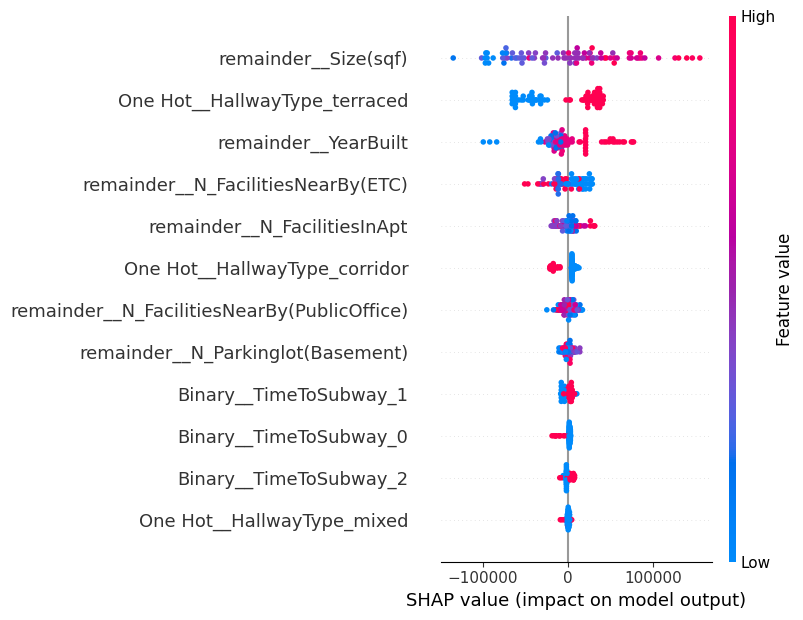

In [2548]:
import shap

shap_values = shap.TreeExplainer(final_model['model'],
                                 data = X_train_encod,
                                 feature_perturbation = "interventional",
                                 model_output="raw").shap_values(X_train_encod)
                                 
shap.summary_plot(shap_values, X_train_encod, feature_names = transformer.get_feature_names_out())

***
$\mathbf{\text{How to Read}}$<br>
***
- **y** axis merupakan features yang dimiliki.
- **x** axis (SHAP) menjelaskan seberapa besar kontribusi setiap feature berdasarkan nilainya. Kontribusinya lebih tinggi ketika warna **merah**, dan sebaliknya rendah untuk warna **biru**. Penentuan warna didasarkan pada nilai terhadap pusat titik koordinat 0.0. Sisi kanansumbu 0.0 berarti mendukung prediksi dengan nilai hingga **100000**, sementara sisi kiri mendukung prediksi nilai **-100000**. Nilai SHAP dapat diartikan seperti koefisien **korelasi**, artinya magnitudi memiliki makna yang sama antara positif dan negatif.
- **Warna Merah dan Biru** menunjukkan bagaimana model menentukan apakah nilai SHAP mendukung prediksi bernilai **100000** atau **-100000**
- **Titik data** menunjukkan titik data sebenarnya dalam dataset. 

Dapat disimpulkan bahwa secara keseluruhan top 5 fitur yang paling berpengaruh terhadap model adalah **'Size(sqf)'**, **'HallwayType'**, **'YearBuilt'**, **'N_FacilitiesNearBy(ETC)'**, **'FacilitiesInApt'**. Fitur-fitur ini memiliki dampak yang signifikan terhadap hasil prediksi model. Memahami kontribusi fitur-fitur ini dapat membantu dalam mengidentifikasi faktor-faktor penting yang memengaruhi harga apartemen dan memperbaiki kualitas prediksi model

***

#### **Save Model**

In [2549]:
# Save model
import pickle

estimator = Pipeline([('preprocess', transformer), ('model', XGBRegressor())])
estimator.fit(X_train, y_train)

pickle.dump(estimator, open('Model_Daegu_Apartment_XGB.sav', 'wb'))

In [2550]:
# Load model
filename = 'Model_Daegu_Apartment_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [2551]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

np.float64(69401.06370902722)

***

## **5. Conclusion**

Berdasarkan pemodelan yang sudah dilakukan, Top 5 features yang berpengaruh terhadap **harga jual apartment** yaitu:

1. **Size**
    - Ukuran atau luas apartemen memiliki pengaruh yang kuat terhadap harga jual.
    - Semakin besar ukuran apartemen, cenderung harga jualnya semakin tinggi
2. **HallwayType**
    - Jenis koridor atau akses ke unit apartemen juga mempengaruhi harga.
    - Beberapa tipe koridor mungkin memiliki preferensi yang berbeda-beda dari calon pembeli, sehingga mempengaruhi harga jualnya.
3. **YearBuilt**
    - Tahun pembangunan apartemen memainkan peran penting dalam menentukan harga. 
    - Apartmen yang lebih baru atau yang mengikuti tren desain terkini cenderung memiliki harga yang lebih tinggi
4. **FacilitiesNearBy**
    - Jumlah fasilitas yang terdekat di sekitar apartemen juga berkontribusi terhadap harga
    - Lokasi yang memiliki akses mudah ke fasilitas publik biasanya memiliki nilai yang lebih tinggi
5. **FacilitisInApt**
    - Jumlah fasilitas yang tersedia di dalam unit apatment sendiri juga menjadi faktor penentu harga.
    - Semakin lengkap fasilitas yang dimiliki apartmen, semakin tinggi nilai jualnya

 Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai MAPE yang dihasilkan oleh model setelah dilakukan hyperparameter tuning, yaitu sebesar ~24.13%, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan harga unit apartemen baru di Daegu pada rentang nilai seperti yang dilatih terhadap model, maka perkiraan harganya rata-rata akan meleset kurang lebih sebesar 24.13% dari harga seharusnya. 
 
 Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara harga aktual dan prediksi. Bias yang dihasilkan oleh model ini dikarenakan oleh terbatasnya fitur pada dataset yang bisa merepresentasikan aspek properti dan juga services, seperti lantai unit, jumlah kamar, view unit, status legalitas kepemilikan dan lain lain.

 Model ini tentu masih dapat diimporvisasi agar dapat menghasilkan prediksi yang lebih baik lagi.   

***

## **6. Recommendations**

Berdasarkan analisis dan hasil model machine learning yang telah dikembangkan, berikut ini adalah beberapa rekomendasi untuk pemilik apartemen di Daegu:

1. **Ukuran Unit Apartemen** </br>
     - Ukuran unit sangat berpengaruh terhadap harga jual, pemilik dapat mempertimbangkan untuk mengembangkan apartemen yang lebih luas yang dapat menawarkan banyak benefit dengan ukuran unit yang lebih besar
     
2. **Tipe Koridor** </br>
    - Karena jenis koridor memiliki dampak signifikan terhadap harga jual, pertimbangkan untuk menawarkan berbagai tipe koridor yang lebih menarik seperti **terraced** atau fungsi yang lebih efisien yang mungkin lebih disukai oleh pembeli potensial.

3. **Tahun Pembuatan** </br>
    - Berikan perhatian khusus pada apartemen yang lebih tua dengan mempertimbangkan renovasi untuk meningkatkan nilai jual. Tahun pembangunan berperan penting dalam menentukan harga, sehingga pembaruan bisa meningkatkan daya tarik apartemen tersebut.
    - Jika apartemen memiliki karakteristik khas dari era tertentu atau gaya arsitektur tertentu, ini bisa menjadi poin penjualan yang menarik bagi pembeli

4. **Fasilitas Terdekat** </br>
    - Investasikan dalam fasilitas terdekat yang dapat meningkatkan nilai properti, seperti keberadaan fasilitas umum dan akses transportasi. Lokasi yang strategis dengan akses mudah ke fasilitas umum dapat menarik minat pembeli lebih banyak
    
5. **Fasilitas di dalam Apartemen** </br>
    - Tingkatkan dan promosikan fasilitas yang tersedia di dalam apartemen. Apartemen dengan fasilitas internal lengkap seperti keamanan, gym, dan area rekreasi cenderung memiliki nilai jual yang lebih tinggi.
